<a href="https://colab.research.google.com/github/ashwynsrinivasan/friendly-system-lmi/blob/main/ec101_analysis_20250102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import gspread
from google.colab import auth
auth.authenticate_user()
from google.auth import default
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import scipy.constants as const

In [19]:
creds, _ = default()
gc = gspread.authorize(creds)

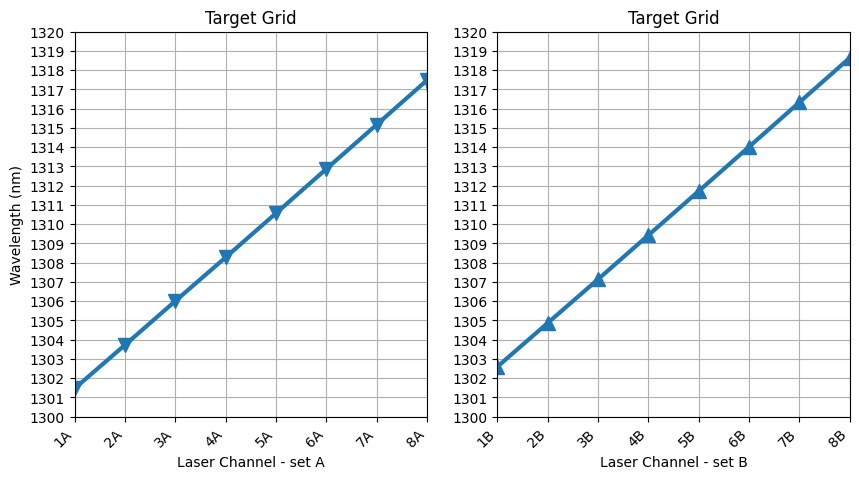

<Figure size 640x480 with 0 Axes>

In [20]:
target_grid = {'1A': 1301.47, '2A': 1303.73, '3A': 1306.01, '4A': 1308.28, '5A': 1310.57, '6A': 1312.87, '7A': 1315.17, '8A': 1317.48, '1B': 1302.6, '2B': 1304.87, '3B': 1307.14 ,'4B': 1309.43, '5B': 1311.72, '6B': 1314.02, '7B': 1316.33, '8B': 1318.64}

grid_temperature_sensitivity = 0.01 #nm/C

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(target_grid.keys(), target_grid.values(), linewidth=3.0, marker='v', markersize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim([-0, 7])
plt.ylim([1300, 1320])
plt.yticks(np.arange(1300, 1321, 1))
plt.xlabel('Laser Channel - set A')
plt.ylabel('Wavelength (nm)')
plt.title('Target Grid')
plt.grid(True)
plt.subplot(122)
plt.plot(target_grid.keys(), target_grid.values(), linewidth=3.0, marker='^', markersize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim([8, 15])
plt.ylim([1300, 1320])
plt.yticks(np.arange(1300, 1321, 1))
plt.xlabel('Laser Channel - set B')
plt.title('Target Grid')
plt.grid(True)
plt.show()
plt.tight_layout()

In [21]:
PD_18QTY = 'Testing_Report_Lightmatter_Datasheet_PD_QTY18_0611241741'
LD_18QTY = 'Testing_Report_Lightmatter_Datasheet_LD_QTY18_0611241741'

PD_36QTY = 'Testing_Report_Lightmatter_Datasheet_PD_QTY36_2511241745'
LD_36QTY = 'Testing_Report_Lightmatter_Datasheet_LD_QTY36_2511241745'

In [14]:
worksheet = gc.open(PD_18QTY).sheet1
rows = worksheet.get_all_values()
PD_25C_df = pd.DataFrame.from_records(rows)
PD_25C_df.columns = PD_25C_df.loc[0].values
PD_25C_df.drop(0, inplace=True)
laser_combo = PD_25C_df['PD'].to_list()
target_wavelengths = np.array([target_grid[val] for val in laser_combo]).T
PD_25C_df['PD Wavelength (nm)'] = PD_25C_df['PD Wavelength (nm)'].astype(float)
PD_25C_df['PD 1dB Passband Width (nm)'] = PD_25C_df['PD 1dB Passband Width (nm)'].astype(float)
PD_25C_df['PD IL (dB)'] = PD_25C_df['PD IL (dB)'].astype(float)
PD_25C_df['Reference Loss (dB)'] = 1.9
PD_25C_df['Target Wavelength (nm)'] = target_wavelengths
PD_25C_df['Measured Temperature (C)'] = 25
PD_25C_df['Target Temperature (C)'] = 25
PD_25C_df['Corrected Wavelength (nm)'] = PD_25C_df['PD Wavelength (nm)'] + grid_temperature_sensitivity * PD_25C_df['Target Temperature (C)'] - grid_temperature_sensitivity * PD_25C_df['Measured Temperature (C)']
PD_25C_df['Wavelength error (nm)'] = PD_25C_df['Target Wavelength (nm)'] - PD_25C_df['Corrected Wavelength (nm)']
PD_25C_df['Frequency error (GHz)'] = const.c/ PD_25C_df['Target Wavelength (nm)'] - const.c / PD_25C_df['Corrected Wavelength (nm)']
PD_25C_df['PD On Chip Loss (dB)'] = PD_25C_df['PD IL (dB)'] - PD_25C_df['Reference Loss (dB)']

worksheet = gc.open(LD_18QTY).sheet1
rows = worksheet.get_all_values()
LD_25C_df = pd.DataFrame.from_records(rows)
LD_25C_df.columns = LD_25C_df.loc[0].values
LD_25C_df.drop(0, inplace=True)
laser_combo = LD_25C_df['Laser'].to_list()
target_wavelengths = np.array([target_grid[val] for val in laser_combo]).T
LD_25C_df['LD Wavelength (nm)'] = LD_25C_df['LD Wavelength (nm)'].astype(float)
LD_25C_df['LD 1dB Passband Width (nm)'] = LD_25C_df['LD 1dB Passband Width (nm)'].astype(float)
LD_25C_df['LD IL (dB)'] = LD_25C_df['LD IL (dB)'].astype(float)
LD_25C_df['Reference Loss (dB)'] = 1.9
LD_25C_df['Target Wavelength (nm)'] = target_wavelengths
LD_25C_df['Measured Temperature (C)'] = 25
LD_25C_df['Target Temperature (C)'] = 25
LD_25C_df['Corrected Wavelength (nm)'] = LD_25C_df['LD Wavelength (nm)'] + grid_temperature_sensitivity * LD_25C_df['Target Temperature (C)'] - grid_temperature_sensitivity * LD_25C_df['Measured Temperature (C)']
LD_25C_df['Wavelength error (nm)'] = LD_25C_df['Target Wavelength (nm)'] - LD_25C_df['Corrected Wavelength (nm)']
LD_25C_df['Frequency error (GHz)'] = const.c/ LD_25C_df['Target Wavelength (nm)'] - const.c / LD_25C_df['Corrected Wavelength (nm)']
LD_25C_df['LD On Chip Loss (dB)'] = LD_25C_df['LD IL (dB)'] - LD_25C_df['Reference Loss (dB)']

worksheet = gc.open(PD_36QTY).sheet1
rows = worksheet.get_all_values()
PD_50C_df = pd.DataFrame.from_records(rows)
PD_50C_df.columns = PD_50C_df.loc[0].values
PD_50C_df.drop(0, inplace=True)
laser_combo = PD_50C_df['PD'].to_list()
target_wavelengths = np.array([target_grid[val] for val in laser_combo]).T
PD_50C_df['PD Wavelength (nm)'] = PD_50C_df['PD Wavelength (nm)'].astype(float)
PD_50C_df['PD 1dB Passband Width (nm)'] = PD_50C_df['PD 1dB Passband Width (nm)'].astype(float)
PD_50C_df['PD IL (dB)'] = PD_50C_df['PD IL (dB)'].astype(float)
PD_50C_df['Reference Loss (dB)'] = 1.9
PD_50C_df['Target Wavelength (nm)'] = target_wavelengths
PD_50C_df['Measured Temperature (C)'] = 25
PD_50C_df['Target Temperature (C)'] = 50
PD_50C_df['Corrected Wavelength (nm)'] = PD_50C_df['PD Wavelength (nm)'] + grid_temperature_sensitivity * PD_50C_df['Target Temperature (C)'] - grid_temperature_sensitivity * PD_50C_df['Measured Temperature (C)']
PD_50C_df['Wavelength error (nm)'] = PD_50C_df['Target Wavelength (nm)'] - PD_50C_df['Corrected Wavelength (nm)']
PD_50C_df['Frequency error (GHz)'] = const.c/ PD_50C_df['Target Wavelength (nm)'] - const.c / PD_50C_df['Corrected Wavelength (nm)']
PD_50C_df['PD On Chip Loss (dB)'] = PD_50C_df['PD IL (dB)'] - PD_50C_df['Reference Loss (dB)']

worksheet = gc.open(LD_36QTY).sheet1
rows = worksheet.get_all_values()
LD_50C_df = pd.DataFrame.from_records(rows)
LD_50C_df.columns = LD_50C_df.loc[0].values
LD_50C_df.drop(0, inplace=True)
laser_combo = LD_50C_df['Laser'].to_list()
target_wavelengths = np.array([target_grid[val] for val in laser_combo]).T
LD_50C_df['LD Wavelength (nm)'] = LD_50C_df['LD Wavelength (nm)'].astype(float)
LD_50C_df['LD 1dB Passband Width (nm)'] = LD_50C_df['LD 1dB Passband Width (nm)'].astype(float)
LD_50C_df['LD IL (dB)'] = LD_50C_df['LD IL (dB)'].astype(float)
LD_50C_df['Reference Loss (dB)'] = 1.9
LD_50C_df['Target Wavelength (nm)'] = target_wavelengths
LD_50C_df['Measured Temperature (C)'] = 25
LD_50C_df['Target Temperature (C)'] = 50
LD_50C_df['Corrected Wavelength (nm)'] = LD_50C_df['LD Wavelength (nm)'] + grid_temperature_sensitivity * LD_50C_df['Target Temperature (C)'] - grid_temperature_sensitivity * LD_50C_df['Measured Temperature (C)']
LD_50C_df['Wavelength error (nm)'] = LD_50C_df['Target Wavelength (nm)'] - LD_50C_df['Corrected Wavelength (nm)']
LD_50C_df['Frequency error (GHz)'] = const.c / LD_50C_df['Target Wavelength (nm)'] - const.c / LD_50C_df['Corrected Wavelength (nm)']
LD_50C_df['LD On Chip Loss (dB)'] = LD_50C_df['LD IL (dB)'] - LD_50C_df['Reference Loss (dB)']

In [15]:
PD_df = pd.concat([PD_25C_df, PD_50C_df])
LD_df = pd.concat([LD_25C_df, LD_50C_df])

PD_df['Freq Pass'] = False
PD_df.loc[np.abs(PD_df['Frequency error (GHz)']) < 17.5, 'Freq Pass'] = True

for chip in PD_df['Chip ID'].unique():
  chip_df = PD_df[PD_df['Chip ID'] == chip]
  if len(chip_df['Freq Pass'].unique()) > 1:
    PD_df.loc[PD_df['Chip ID'] == chip, 'Freq Pass'] = False

chip_qty_freq_pass = int(np.sum(PD_df['Freq Pass'].to_list())/16)

LD_df['Loss Pass'] = False
LD_df.loc[np.abs(LD_df['LD On Chip Loss (dB)']) < 2.0 , 'Loss Pass'] = True

for chip in LD_df['Chip ID'].unique():
  chip_df = LD_df[LD_df['Chip ID'] == chip]
  if len(chip_df['Loss Pass'].unique()) > 1:
    LD_df.loc[LD_df['Chip ID'] == chip, 'Loss Pass'] = False

chip_qty_loss_pass = int(np.sum(LD_df['Loss Pass'].to_list())/16)

In [16]:
fig = px.scatter(PD_df, x='PD', y='Frequency error (GHz)', color=PD_df['Chip ID'])
fig.update_traces(marker_size=10)
fig.update_xaxes(categoryorder='array', categoryarray= ['1A', '2A', '3A', '3A', '4A', '5A', '6A', '7A', '8A', '1B', '2B', '3B', '4B', '5B', '6B', '7B', '8B'])
fig.update_layout(title=dict(text="PD channel - Total "+str(len(PD_df['Chip ID'].unique()))+" Chips, Pass - " +str(chip_qty_freq_pass) + " Chips, Rest Failed", font=dict(size=33)))

In [17]:
fig = px.scatter(LD_df, x='Laser', y='Frequency error (GHz)', color=LD_df['Chip ID'])
fig.update_traces(marker_size=10)
fig.update_xaxes(categoryorder='array', categoryarray= ['1A', '2A', '3A', '3A', '4A', '5A', '6A', '7A', '8A', '1B', '2B', '3B', '4B', '5B', '6B', '7B', '8B'])
fig.update_layout(title=dict(text="LD channel - Total "+str(len(LD_df['Chip ID'].unique()))+" Chips, Loss Pass - " +str(chip_qty_loss_pass) + " Chips, Rest Failed", font=dict(size=33)))

In [22]:
fig = px.scatter(LD_df, x='Laser', y='LD On Chip Loss (dB)', color=LD_df['Chip ID'])
fig.update_traces(marker_size=10)
fig.update_xaxes(categoryorder='array', categoryarray= ['1A', '2A', '3A', '3A', '4A', '5A', '6A', '7A', '8A', '1B', '2B', '3B', '4B', '5B', '6B', '7B', '8B'])
fig.update_layout(title=dict(text="LD channel - Total "+str(len(LD_df['Chip ID'].unique()))+" Chips, Loss Pass - " +str(chip_qty_loss_pass) + " Chips, Rest Failed", font=dict(size=33)))